In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Methane Flux

In [2]:
######################## Input parameters #########################
files = 200
points_per_file = 100000
cases = ['case_a', 'case_b', 'case_c']        #uniform, lognormal, normal

######################## Initialize processing files #########################
min_v, max_v = -10, -7
x = np.logspace(min_v,max_v,1000)

Data
Case:  case_a  Mean:  5.607616199574094e-08  Var:  5.333964206276527e-15  Skew:  2.246150006490002  Kurtosis:  9.158690939249105  CV:  1.3024071352033642
Fitted
Case:  case_a  mu:  2.3183944250112735e-08  sigma:  1.4926874067011697
Data
Case:  case_b  Mean:  5.2487539335775065e-08  Var:  3.0968740451496026e-15  Skew:  1.9976723151939877  Kurtosis:  8.351200378748421  CV:  1.0602433520219203
Fitted
Case:  case_b  mu:  2.883710313302387e-08  sigma:  1.2250519989496298
Data
Case:  case_c  Mean:  1.3740512851790872e-08  Var:  8.017901203629041e-16  Skew:  6.011864614757763  Kurtosis:  55.255573849980806  CV:  2.060759960429288
Fitted
Case:  case_c  mu:  5.712471061673333e-09  sigma:  1.2637616339568114


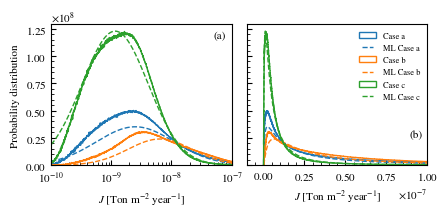

In [3]:
casess = ['Case a', 'Case b', 'Case c']
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.style.use('stylesheet.mpltstyle_histograms')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4.3, 2), sharey = True)

for counter, case in enumerate(cases):
    data = np.zeros((points_per_file*files, 29))
    ######################## Read files and join them in only one array #########################
    for j in range(files):
        data_file = np.load('../Results/model_eval/'+case+'/wu_eval_'+str(j)+".npy")
        data[j*points_per_file:(j+1)*points_per_file,:] = data_file

    Results = data[:,18]
    print('Data')
    print('Case: ', case, ' Mean: ', np.mean(Results), ' Var: ', np.var(Results), ' Skew: ', sp.stats.skew(Results), ' Kurtosis: ', sp.stats.kurtosis(Results)+3, ' CV: ', np.std(Results)/np.mean(Results))
    ax[0].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])
    ax[1].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])

    print('Fitted')
    s, loc, scale = sp.stats.lognorm.fit(Results, floc = 0)
    print('Case: ', case, ' mu: ', scale, ' sigma: ', s)
    pdf_fitted_automatic = sp.stats.lognorm.pdf(x, s, loc, scale)
    ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ######################## Histogram #########################


ax[0].set_xlabel(r'$J$ [Ton m$^{-2}$ year$^{-1}$]')
ax[0].set_ylabel('Probability distribution')
ax[0].set_xscale('log')
ax[0].annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax[0].set_xlim(1*10**min_v,1*10**max_v)

ax[1].set_xlabel(r'$J$ [Ton m$^{-2}$ year$^{-1}$]')
ax[1].annotate("(b)", xy=(0.9, 0.2), xycoords="axes fraction")
ax[1].set_xlim(-1*10**-8,1e-7)

ax[1].legend()

plt.savefig('../Figures/pdf_J.pdf')
plt.show()

### Diffusion coefficient

In [4]:
######################## Input parameters #########################
files = 200
points_per_file = 100000
cases = ['case_a', 'case_b', 'case_c']        #uniform, lognormal, normal

######################## Initialize processing files #########################
min_v, max_v = -9, -5
x = np.logspace(min_v,max_v,1000)

Data
Case:  case_a  Mean:  3.1215787018668e-06  Var:  1.5736214714482916e-11  Skew:  2.170106079973895  Kurtosis:  8.719574444920983  CV:  1.2707960242362104
Fitted
Case:  case_a  mu:  1.3268529500135027e-06  sigma:  1.4732022515525578
Data
Case:  case_b  Mean:  2.94012019578701e-06  Var:  9.277403986736763e-12  Skew:  1.9211074794998741  Kurtosis:  7.891197508874435  CV:  1.0359723134296883
Fitted
Case:  case_b  mu:  1.6459247748679712e-06  sigma:  1.2077760852618027
Data
Case:  case_c  Mean:  7.749263841651276e-07  Var:  2.4043789260925316e-12  Skew:  5.82124771674865  Kurtosis:  52.001339295938536  CV:  2.000971987040623
Fitted
Case:  case_c  mu:  3.269334019944138e-07  sigma:  1.2649324927381809


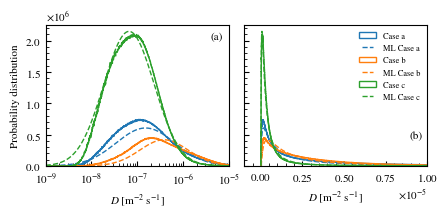

In [5]:
casess = ['Case a', 'Case b', 'Case c']
colors = ['tab:blue', 'tab:orange', 'tab:green']


plt.style.use('stylesheet.mpltstyle_histograms')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4.3, 2), sharey = True)

for counter, case in enumerate(cases):
    data = np.zeros((points_per_file*files, 29))
    ######################## Read files and join them in only one array #########################
    for j in range(files):
        data_file = np.load('../Results/model_eval/'+case+'/wu_eval_'+str(j)+".npy")
        data[j*points_per_file:(j+1)*points_per_file,:] = data_file

    Results = data[:,22]
    print('Data')
    print('Case: ', case, ' Mean: ', np.mean(Results), ' Var: ', np.var(Results), ' Skew: ', sp.stats.skew(Results), ' Kurtosis: ', sp.stats.kurtosis(Results)+3, ' CV: ', np.std(Results)/np.mean(Results))
    ax[0].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])
    ax[1].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])

    print('Fitted')
    s, loc, scale = sp.stats.lognorm.fit(Results, floc = 0)
    print('Case: ', case, ' mu: ', scale, ' sigma: ', s)
    pdf_fitted_automatic = sp.stats.lognorm.pdf(x, s, loc, scale)
    ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ######################## Histogram #########################


ax[0].set_xlabel(r'$D$ [m$^{-2}$ s$^{-1}$]')
ax[0].set_ylabel('Probability distribution')
ax[0].set_xscale('log')
ax[0].annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax[0].set_xlim(1*10**min_v,1*10**max_v)

ax[1].set_xlabel(r'$D$ [m$^{-2}$ s$^{-1}$]')
ax[1].annotate("(b)", xy=(0.9, 0.2), xycoords="axes fraction")
ax[1].set_xlim(-1*10**-6,1e-5)

ax[1].legend()

plt.savefig('../Figures/pdf_D.pdf')
plt.show()

### Permeability

In [6]:
######################## Input parameters #########################
files = 200
points_per_file = 100000
cases = ['case_a', 'case_b', 'case_c']        #uniform, lognormal, normal

######################## Initialize processing files #########################
min_v, max_v = -17, -12
x = np.logspace(min_v,max_v,1000)

Data
Case:  case_a  Mean:  1.0311170782908638e-13  Var:  1.3764694354068975e-26  Skew:  2.390186623344885  Kurtosis:  29.48170414691884  CV:  1.1378245659087893
Fitted
Case:  case_a  mu:  4.822860958002284e-14  sigma:  1.4342126215897868
Data
Case:  case_b  Mean:  8.992914290995979e-14  Var:  7.422491173046548e-27  Skew:  1.7635945180838142  Kurtosis:  9.191077355269947  CV:  0.9580195917567342
Fitted
Case:  case_b  mu:  5.3204264234803633e-14  sigma:  1.1658713287036062
Data
Case:  case_c  Mean:  3.318285286483e-14  Var:  6.002322640791267e-27  Skew:  13.797040683326696  Kurtosis:  522.6808273078411  CV:  2.334779904878233
Fitted
Case:  case_c  mu:  1.1883481688272882e-14  sigma:  1.414916380006958


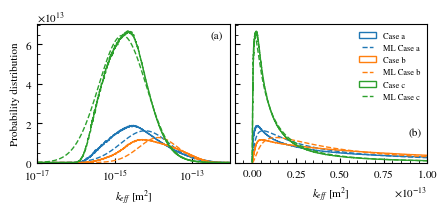

In [7]:
casess = ['Case a', 'Case b', 'Case c']
colors = ['tab:blue', 'tab:orange', 'tab:green']


plt.style.use('stylesheet.mpltstyle_histograms')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4.3, 2), sharey = True)

for counter, case in enumerate(cases):
    data = np.zeros((points_per_file*files, 29))
    ######################## Read files and join them in only one array #########################
    for j in range(files):
        data_file = np.load('../Results/model_eval/'+case+'/wu_eval_'+str(j)+".npy")
        data[j*points_per_file:(j+1)*points_per_file,:] = data_file

    Results = data[:,18]*data[:,27]/(0.1*data[:,28])
    print('Data')
    print('Case: ', case, ' Mean: ', np.mean(Results), ' Var: ', np.var(Results), ' Skew: ', sp.stats.skew(Results), ' Kurtosis: ', sp.stats.kurtosis(Results)+3, ' CV: ', np.std(Results)/np.mean(Results))
    ax[0].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])
    ax[1].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])

    print('Fitted')
    s, loc, scale = sp.stats.lognorm.fit(Results, floc = 0)
    print('Case: ', case, ' mu: ', scale, ' sigma: ', s)
    pdf_fitted_automatic = sp.stats.lognorm.pdf(x, s, loc, scale)
    ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ######################## Histogram #########################


ax[0].set_xlabel(r'$k_{eff}$ [m$^{2}$]')
ax[0].set_ylabel('Probability distribution')
ax[0].set_xscale('log')
ax[0].annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax[0].set_xlim(1*10**min_v,1*10**max_v)

ax[1].set_xlabel(r'$k_{eff}$ [m$^{2}$]')
ax[1].annotate("(b)", xy=(0.9, 0.2), xycoords="axes fraction")
ax[1].set_xlim(-1*10**-14,1e-13)

ax[1].legend()

plt.savefig('../Figures/pdf_k.pdf')
plt.show()